In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
haberman = pd.read_csv('haberman.csv')

In [4]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
haberman.size


1224

In [6]:
haberman.shape

(306, 4)

In [7]:
haberman['status']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      2
8      2
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     2
25     1
26     1
27     1
28     1
29     1
      ..
276    1
277    1
278    1
279    1
280    1
281    2
282    1
283    1
284    1
285    2
286    2
287    1
288    1
289    1
290    1
291    1
292    1
293    2
294    1
295    1
296    1
297    1
298    1
299    2
300    1
301    1
302    1
303    1
304    2
305    2
Name: status, Length: 306, dtype: int64

# now we know how our dataset looks like
#it has 3 features (age ,year, nodes ) and a label (status)
#lets make a 2D scatter plot first with each feature one by one

<function matplotlib.pyplot.show(*args, **kw)>

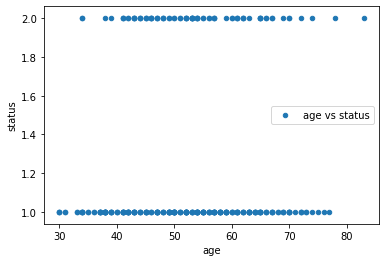

In [20]:
haberman.plot(kind = 'scatter' , x='age' , y='status' , label='age vs status')
plt.legend()
plt.show

#observation : lets assume 2 = lives longer than 5 year ; 1 = dies within 5 year 
#dead and alive both are equally dristributed age cannot determine the livability

<function matplotlib.pyplot.show(*args, **kw)>

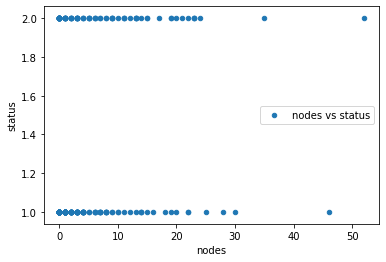

In [27]:
haberman.plot(kind = 'scatter' , x='nodes' , y='status',label='nodes vs status')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

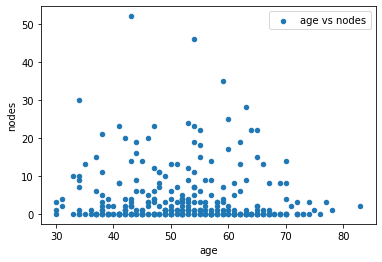

In [28]:
haberman.plot(kind = 'scatter' , x='age' , y='nodes',label='age vs nodes')
plt.show

#there are a bunch of outliers 
# there is hign chances of having (nodes < 5) age 33-70

<function matplotlib.pyplot.show(*args, **kw)>

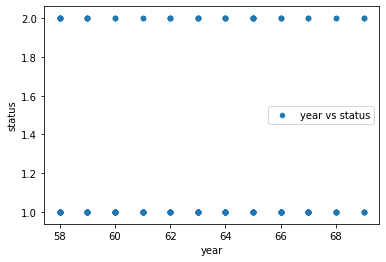

In [29]:
haberman.plot(kind = 'scatter' , x='year' , y='status',label='year vs status')
plt.show

#its not getting me anything useful 
#lets make pair plot

In [33]:
import seaborn as sns

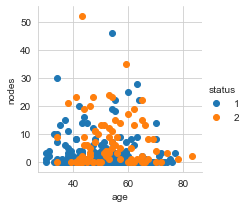

In [39]:
sns.FacetGrid(haberman, hue="status", height=3) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend()
plt.show()

#cannot be seperated clearly

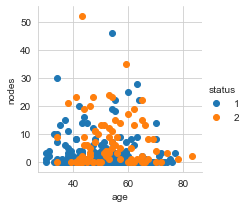

In [38]:
sns.FacetGrid(haberman, hue="status", height=3) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend()
plt.show()

In [31]:
plt.close()


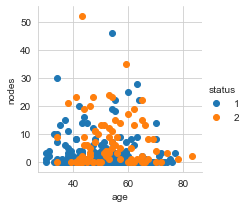

In [35]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", height=3) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend()
plt.show()


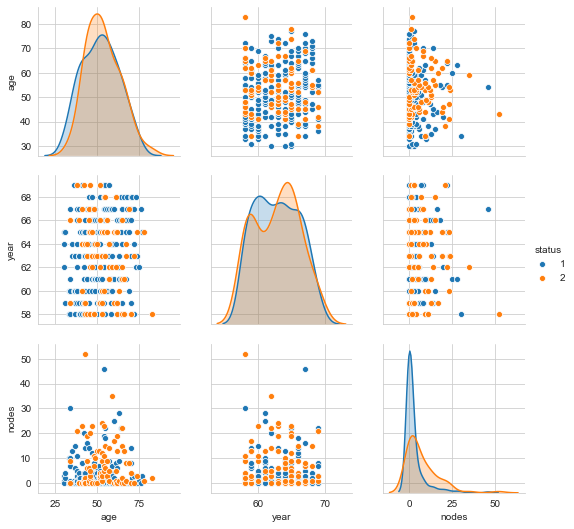

In [91]:
sns.pairplot(haberman ,vars=['age','year','nodes'], hue='status')

#the points are all mixed up  and clearly noon seperable in a 2D plane

c:\python\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


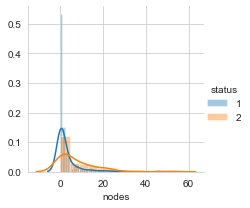

In [43]:
sns.FacetGrid(haberman, hue="status", size=3) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show()

#we can see that the probablity of having a node and surviving more than 5 year as well as not surviving more than 5 year have different mu (mean value) 
#and different spread value (sigma) , survival distribution has skewed tail more skewed than the non-survival distribution
#having more than 5 node and surviving has higher probablity as both the distribution function roughly intersects at value=5
#sigma(spread) of survivors is more than non survivors it means the treatment is benificial.

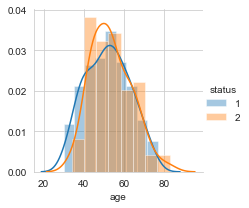

In [44]:
sns.FacetGrid(haberman, hue="status", size=3) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show()

#there is a massive overlapping between two distributions age and death through breast cancer might not have relation

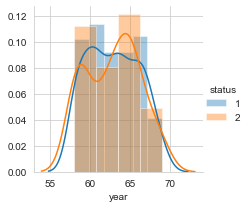

In [45]:
sns.FacetGrid(haberman, hue="status", size=3) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show()

again its a massive overlap

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


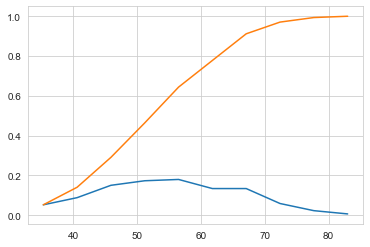

In [60]:
counts, bin_edges = np.histogram(haberman['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

cdf : 90% of people have age less than 67 roughly
pdf : people with age group of 40-70 years are most likely to face the problem, 40-70 is the most probable zone

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


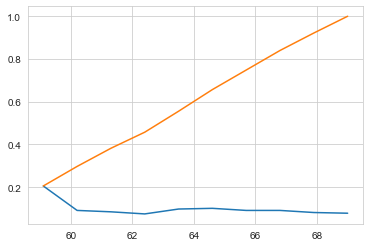

In [61]:
counts, bin_edges = np.histogram(haberman['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


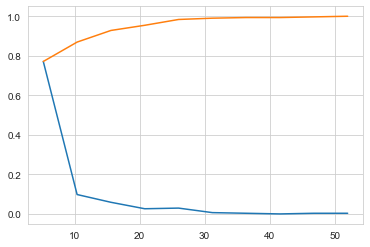

In [62]:
counts, bin_edges = np.histogram(haberman['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

pdf : the probablity of having less than 10 nodes is roughly 69%
cdf : in 90% cases people had less than 15 nodes

#lets study the graph on yearly basis

In [46]:
habermanyearly=haberman.groupby(['year','status'])

In [97]:
habermanyearly.first()

age  nodes
year status            
58   1        33     10
     2        43     52
59   1        31      2
     2        34      0
60   1        33      0
     2        41     23
61   1        34     10
     2        57      5
62   1        30      3
     2        46      5
63   1        35      0
     2        44     19
64   1        30      1
     2        41      0
65   1        30      0
     2        45      6
66   1        38      0
     2        34      9
67   1        34      7
     2        41      0
68   1        45      0
     2        54      7
69   1        36      0
     2        38     21

#observation: there is some overlap in the age of survivor but we can say that whatever the year mostly people with age less 
#than or equal to 35 is likely to die with high probablity whereas people with age more than and equal to 38 can survive with 
#high probablity

#mean age of people going into surgery

In [101]:
print(np.mean(haberman['age']))

52.45751633986928


#average number of nodes found in each patient

In [102]:
print(np.mean(haberman['nodes']))

4.026143790849673


#standard deviation of age

In [103]:
print(np.std(haberman['age']))

10.785785203631832


#standard deviation of nodes

In [104]:
print(np.std(haberman['nodes']))

7.177896092811143


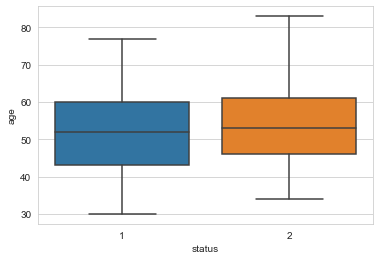

In [48]:
sns.boxplot(x='status',y='age', data=haberman)

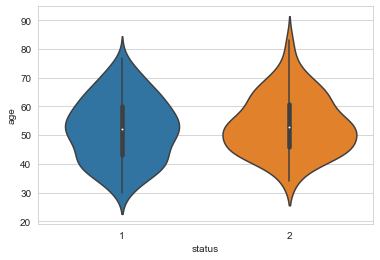

In [110]:
sns.violinplot(x='status',y='age', data=haberman)

#based on my conclusion i can say that survival can be related to age roughly

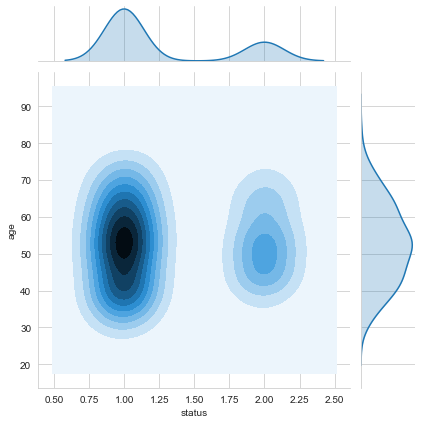

In [112]:
sns.jointplot(x="status", y="age", data=haberman, kind="kde")

(array([14., 26., 40., 44., 56., 35., 38., 28., 18.,  6.,  1.]),
 array([30.        , 34.81818182, 39.63636364, 44.45454545, 49.27272727,
        54.09090909, 58.90909091, 63.72727273, 68.54545455, 73.36363636,
        78.18181818, 83.        ]),
 <a list of 11 Patch objects>)

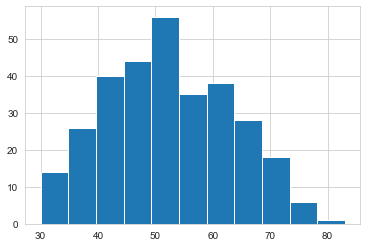

In [115]:
plt.hist(haberman['age'], bins='auto')

#refrence : AppliedAI Notes , geeksforgeeks ,tutorialpoint , matplotlib docs , seaborn docs

conclusion : the people who lives or dies cannot be determined as they do not show some common trend we cannot say for certain that if a person will survive or not based on simple data analysis. the best chances to predict is by using age and no of nodes to tell if he will survive or not.